In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Diabetes_clean2.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,59,0,18,...,No,No,No,No,No,No,Up,Ch,Yes,NO
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,44,1,16,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,51,0,8,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [5]:
X = df.drop('readmitted', 1)
y = df['readmitted']

In [8]:
df_meds = pd.DataFrame()

In [9]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'preceding_year_visits', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
df['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [11]:
for i in ['metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin']:
    df_meds[i] = df[i].replace({'No' : 0,
                               'Down' : 1,
                               'Steady' : 2,
                               'Up' : 3})

In [14]:
df_meds

,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,3
2,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,3
4,0,0,0,2,0,0,0,2
...,...,...,...,...,...,...,...,...
100065,2,0,0,0,0,0,0,1
100066,0,0,0,0,0,0,0,2
100067,2,0,0,0,0,0,0,1
100068,0,0,0,2,0,2,0,3


In [16]:
inertia = []
sil = []
k = list(range(2, 10))
for i in k:
    km = KMeans(n_clusters = i, precompute_distances = True, random_state = 0, n_jobs = -1)
    km.fit(df_meds, )
    labels = km.labels_
    inertia.append(km.inertia_)
    sil.append(silhouette_score(df_meds, labels))
clust_df = pd.DataFrame({'n_clusters' : k, 'inertia' : inertia, 'sil_score' : sil})
clust_df

,n_clusters,inertia,sil_score
0,2,249707.900229,0.358635
1,3,202964.671709,0.399657
2,4,176068.882094,0.431483
3,5,154502.850310,0.459282
4,6,144765.632959,0.472543
5,7,129661.322264,0.502183
6,8,116201.758504,0.522488
7,9,108287.775925,0.537481


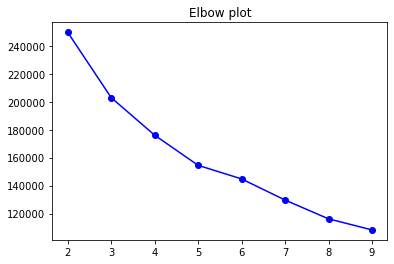

In [19]:
plt.plot(clust_df.n_clusters, clust_df.inertia, marker = 'o', c = 'b')
plt.title("Elbow plot")
plt.show()

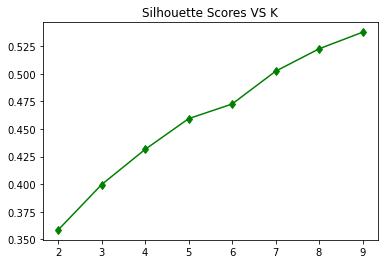

In [20]:
plt.plot(clust_df.n_clusters, clust_df.sil_score, marker = 'd', c = 'g')
plt.title('Silhouette Scores VS K')
plt.show()